In [1]:
# Initial imports
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [2]:
# Loading data
df = pd.read_csv("Resources/final_panel_data.csv")
pd.set_option('display.max_columns', None)
df.head()

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_hours,annual_income,white,black,hisp,other_race,degree,09_updated_degree,updated_years_of_education,annual_weeks_worked,union_job,usual_hours_per_week,labor_income_from_business,years_experience,full_time_experience,part_time_experience,government_worker,hourly_wage,wage_inflation_factor,adj_hourly_wage,real_hourly_wage,full_time_job,potential_experience,high_school_or_less,bachelors_degree,advanced_degree,occupation_category,agriculture,mining_construction,durables,nondurables,transport,transport.1,utilities,communications,retail_trade,wholesale_trade,finance,social_art_other,hospitality,medical,education,professional,public_admin,manager,business,financial_operations,computer,architect,scientist,socialworker,professor,legal,artist,physicians,healthcare,healthsupport,protective,foodcare,building,sales,office_admin,farmer,construction,production,transport.2,transport.3
0,1981,1,1.0,10,34,16.0,1600,10000.0,1,0,0,0,1.0,1.0,17,32.0,0,50.0,0,12.0,12.0,0.0,0.0,6.0,2.31,14.0,3.0,1,12.0,0,1,0,Other,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1981,1,2.0,10,32,14.0,520,9095.0,0,1,0,0,0.0,0.0,14,13.0,1,40.0,0,14.0,11.0,3.0,0.0,17.0,2.31,40.0,4.0,1,12.0,1,0,0,Production,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2009,1,1.0,10,64,12.0,2550,45200.0,0,1,0,0,0.0,0.0,12,51.0,0,50.0,0,39.0,38.0,1.0,0.0,18.0,1.02,18.0,3.0,1,46.0,1,0,0,Production,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1999,1,2.0,10,50,12.0,3072,25000.0,1,0,0,0,0.0,0.0,12,51.0,0,60.0,0,30.0,30.0,0.0,0.0,8.0,1.27,10.0,2.0,1,32.0,1,0,0,Transportation and Materials Moving,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1990,1,3.0,10,26,12.0,2100,24500.0,1,0,0,0,0.0,0.0,12,50.0,0,42.0,0,8.0,8.0,0.0,0.0,12.0,1.57,18.0,3.0,1,8.0,1,0,0,Production,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [3]:
# Value count column
df['full_time_job'].value_counts()

1    29019
0     4379
Name: full_time_job, dtype: int64

In [4]:
# Display all columns
my_list = list(df)
print (my_list)

['year', 'gender', 'region', 'relation_to_head_of_house', 'age', 'years_of_education', 'annual_hours', 'annual_income', 'white', 'black', 'hisp', 'other_race', 'degree', '09_updated_degree', 'updated_years_of_education', 'annual_weeks_worked', 'union_job', 'usual_hours_per_week', 'labor_income_from_business', 'years_experience', 'full_time_experience', 'part_time_experience', 'government_worker', 'hourly_wage', 'wage_inflation_factor', 'adj_hourly_wage', 'real_hourly_wage', 'full_time_job', 'potential_experience', 'high_school_or_less', 'bachelors_degree', 'advanced_degree', 'occupation_category', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', '

In [5]:
# Drop the non-beneficial columns.
dropped_df = df.drop(['degree', '09_updated_degree', 'annual_hours', 'adj_hourly_wage', 'annual_weeks_worked', 'usual_hours_per_week', 'updated_years_of_education', 'occupation_category', 'labor_income_from_business', 'years_experience', 'hourly_wage', 'wage_inflation_factor', 'real_hourly_wage', 'potential_experience', 'agriculture', 'mining_construction', 'durables', 'nondurables', 'transport', 'transport.1', 'utilities', 'communications', 'retail_trade', 'wholesale_trade', 'finance', 'social_art_other', 'hospitality', 'medical', 'education', 'professional', 'public_admin', 'manager', 'business', 'financial_operations', 'computer', 'architect', 'scientist', 'socialworker', 'professor', 'legal', 'artist', 'physicians', 'healthcare', 'healthsupport', 'protective', 'foodcare', 'building', 'sales', 'office_admin', 'farmer', 'construction', 'production', 'transport.2', 'transport.3'], axis=1)
dropped_df

,year,gender,region,relation_to_head_of_house,age,years_of_education,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,government_worker,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1981,1,1.0,10,34,16.0,10000.0,1,0,0,0,0,12.0,0.0,0.0,1,0,1,0
1,1981,1,2.0,10,32,14.0,9095.0,0,1,0,0,1,11.0,3.0,0.0,1,1,0,0
2,2009,1,1.0,10,64,12.0,45200.0,0,1,0,0,0,38.0,1.0,0.0,1,1,0,0
3,1999,1,2.0,10,50,12.0,25000.0,1,0,0,0,0,30.0,0.0,0.0,1,1,0,0
4,1990,1,3.0,10,26,12.0,24500.0,1,0,0,0,0,8.0,0.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,1990,2,1.0,20,34,16.0,37000.0,1,0,0,0,0,13.0,3.0,0.0,1,0,1,0
33394,1981,2,2.0,20,54,12.0,22198.0,1,0,0,0,0,35.0,0.0,0.0,1,1,0,0
33395,1981,2,3.0,20,33,10.0,7488.0,0,1,0,0,0,3.0,0.0,0.0,1,1,0,0
33396,1999,2,3.0,10,25,11.0,18000.0,0,1,0,0,0,5.0,1.0,0.0,1,1,0,0


In [6]:
# Drop the null-value columns.
model_df = dropped_df.drop(['region', 'years_of_education', 'government_worker', 'annual_income'], axis=1)
pd.set_option('display.max_columns', None)
model_df.head()

,year,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1981,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1981,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,1,0,0
2,2009,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1999,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1990,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,1,0,0


In [7]:
# Check for year values
model_df['year'].unique()

array([1981, 2009, 1999, 1990, 2011, 2007], dtype=int64)

In [8]:
# Make a dataframe with only male candidates
male_df = model_df[model_df['gender']== 1]
male_df

,year,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
0,1981,1,10,34,10000.0,1,0,0,0,0,12.0,0.0,1,0,1,0
1,1981,1,10,32,9095.0,0,1,0,0,1,11.0,3.0,1,1,0,0
2,2009,1,10,64,45200.0,0,1,0,0,0,38.0,1.0,1,1,0,0
3,1999,1,10,50,25000.0,1,0,0,0,0,30.0,0.0,1,1,0,0
4,1990,1,10,26,24500.0,1,0,0,0,0,8.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16231,2009,1,10,31,40000.0,1,0,0,0,1,12.0,0.0,1,1,0,0
16232,2007,1,10,36,71900.0,0,1,0,0,0,16.0,0.0,1,0,0,1
16233,2007,1,10,47,50000.0,0,1,0,0,1,22.0,1.0,1,1,0,0
16234,1990,1,10,56,42000.0,1,0,0,0,0,33.0,3.0,1,1,0,0


In [9]:
# Make a dataframe with only 1981 male candidates
male81_df = male_df[male_df['year']== 1981]

# Make a dataframe with only 1981 male candidates
male90_df = male_df[male_df['year']== 1990]

# Make a dataframe with only 1981 male candidates
male99_df = male_df[male_df['year']== 1999]

# Make a dataframe with only 1981 male candidates
male07_df = male_df[male_df['year']== 2007]

# Make a dataframe with only 1981 male candidates
male11_df = male_df[male_df['year']== 2011]
male11_df

,year,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
5,2011,1,10,39,46500.0,1,0,0,0,0,6.000000,9.000000,1,0,0,1
16,2011,1,10,36,28000.0,1,0,0,0,1,8.896952,2.103048,1,1,0,0
22,2011,1,10,26,42000.0,0,1,0,0,0,2.000000,5.000000,1,1,0,0
24,2011,1,10,55,48000.0,1,0,0,0,0,37.000000,0.000000,1,1,0,0
26,2011,1,10,49,63000.0,0,0,1,0,1,18.000000,6.000000,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16210,2011,1,10,40,20000.0,0,1,0,0,0,17.000000,1.000000,1,1,0,0
16213,2011,1,10,44,36000.0,0,1,0,0,0,23.000000,1.000000,1,1,0,0
16215,2011,1,10,49,130000.0,1,0,0,0,0,18.000000,6.000000,1,0,0,1
16217,2011,1,10,28,30000.0,0,0,0,1,0,8.000000,0.000000,1,1,0,0


In [11]:
# Make a dataframe with only male candidates
female_df = model_df[model_df['gender']== 2]
female_df

,year,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
16236,1981,2,20,35,11300.0,1,0,0,0,0,8.0,0.0,1,1,0,0
16237,2007,2,10,26,28500.0,1,0,0,0,0,2.0,2.0,1,1,0,0
16238,2009,2,20,59,53000.0,1,0,0,0,0,18.0,13.0,1,0,0,1
16239,2007,2,10,45,49800.0,0,1,0,0,0,22.0,0.0,1,1,0,0
16240,1999,2,20,30,26000.0,1,0,0,0,0,10.0,0.0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33393,1990,2,20,34,37000.0,1,0,0,0,0,13.0,3.0,1,0,1,0
33394,1981,2,20,54,22198.0,1,0,0,0,0,35.0,0.0,1,1,0,0
33395,1981,2,20,33,7488.0,0,1,0,0,0,3.0,0.0,1,1,0,0
33396,1999,2,10,25,18000.0,0,1,0,0,0,5.0,1.0,1,1,0,0


In [12]:
# Make a dataframe with only 1981 female candidates
female81_df = female_df[female_df['year']== 1981]

# Make a dataframe with only 1981 female candidates
female90_df = female_df[female_df['year']== 1990]

# Make a dataframe with only 1981 female candidates
female99_df = female_df[female_df['year']== 1999]

# Make a dataframe with only 1981 female candidates
female07_df = female_df[female_df['year']== 2007]

# Make a dataframe with only 1981 female candidates
female11_df = female_df[female_df['year']== 2011]
female11_df

,year,gender,relation_to_head_of_house,age,annual_income,white,black,hisp,other_race,union_job,full_time_experience,part_time_experience,full_time_job,high_school_or_less,bachelors_degree,advanced_degree
16243,2011,2,20,37,6000.0,0,0,1,0,0,12.0,0.0,0,1,0,0
16253,2011,2,20,49,93000.0,1,0,0,0,0,27.0,0.0,1,0,1,0
16258,2011,2,22,31,25000.0,1,0,0,0,0,13.0,0.0,0,1,0,0
16261,2011,2,10,43,1200.0,1,0,0,0,0,20.0,0.0,0,1,0,0
16262,2011,2,10,50,20000.0,1,0,0,0,0,2.0,17.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33369,2011,2,10,37,25000.0,1,0,0,0,0,19.0,0.0,1,1,0,0
33372,2011,2,22,28,50000.0,1,0,0,0,0,10.0,0.0,1,0,1,0
33373,2011,2,20,30,30000.0,1,0,0,0,1,3.0,0.0,1,1,0,0
33383,2011,2,20,46,35000.0,1,0,0,0,1,19.0,2.0,1,1,0,0


In [15]:
# Define features set **
X = male81_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male81_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4,24
Actual 1,2,606


Accuracy Score : 0.9591194968553459
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.14      0.24        28
           1       0.96      1.00      0.98       608

    accuracy                           0.96       636
   macro avg       0.81      0.57      0.61       636
weighted avg       0.95      0.96      0.95       636



[(0.4156720520387571, 'annual_income'),
 (0.19962443648319106, 'full_time_experience'),
 (0.17738490784146138, 'age'),
 (0.11987428577910843, 'part_time_experience'),
 (0.022977751995969704, 'union_job'),
 (0.014664933316514308, 'black'),
 (0.014003437612929893, 'white'),
 (0.010778976429956422, 'high_school_or_less'),
 (0.008860029227079182, 'advanced_degree'),
 (0.007752834380382813, 'bachelors_degree'),
 (0.005725711553669415, 'hisp'),
 (0.002680643340980202, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance - Male 81'}, ylabel='1'>

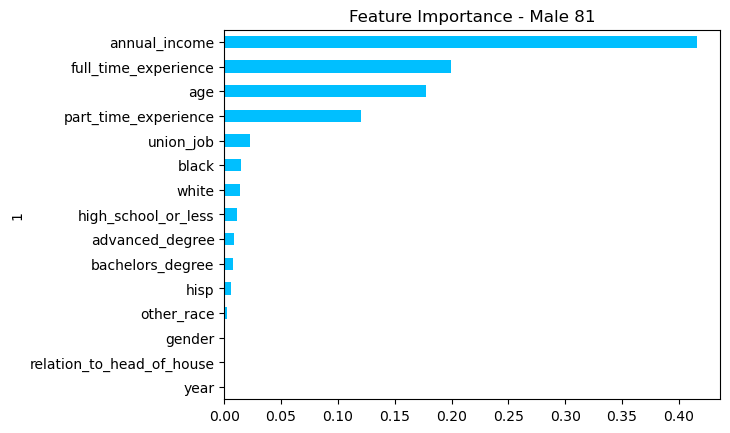

In [17]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance - Male 1981', legend=False)

In [18]:
# Define features set **
X = male90_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male90_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,3,32
Actual 1,5,673


Accuracy Score : 0.9481065918653576
Classification Report
              precision    recall  f1-score   support

           0       0.38      0.09      0.14        35
           1       0.95      0.99      0.97       678

    accuracy                           0.95       713
   macro avg       0.66      0.54      0.56       713
weighted avg       0.93      0.95      0.93       713



[(0.4048092178838432, 'annual_income'),
 (0.19060027389194706, 'full_time_experience'),
 (0.182853792070776, 'age'),
 (0.12676795719785927, 'part_time_experience'),
 (0.027463589536638047, 'union_job'),
 (0.0139654337227102, 'black'),
 (0.013822024675896768, 'white'),
 (0.01105966362593346, 'high_school_or_less'),
 (0.009361376157249824, 'advanced_degree'),
 (0.008827527351176067, 'hisp'),
 (0.008543423185967694, 'bachelors_degree'),
 (0.0019257207000022856, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male1990'}, ylabel='1'>

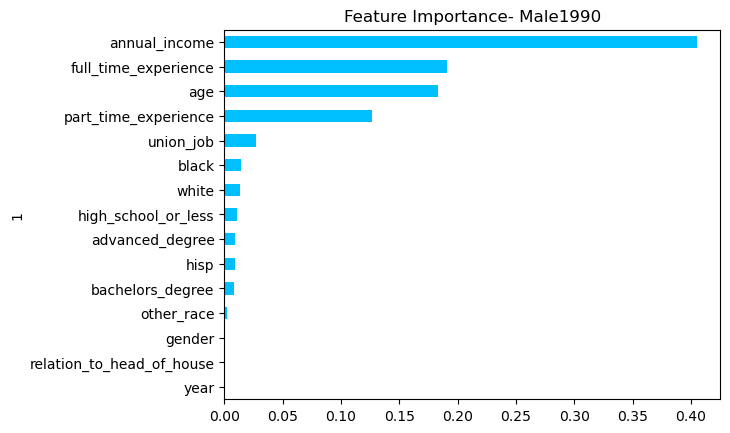

In [19]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 1990', legend=False)

In [20]:
# Define features set **
X = male99_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male99_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,2,26
Actual 1,1,631


Accuracy Score : 0.9590909090909091
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.07      0.13        28
           1       0.96      1.00      0.98       632

    accuracy                           0.96       660
   macro avg       0.81      0.53      0.55       660
weighted avg       0.95      0.96      0.94       660



[(0.3309099211104746, 'annual_income'),
 (0.20364034583382087, 'full_time_experience'),
 (0.1826960413803565, 'age'),
 (0.17037973002338733, 'part_time_experience'),
 (0.03217004886660434, 'union_job'),
 (0.01765958772620096, 'white'),
 (0.017125888058622016, 'high_school_or_less'),
 (0.016065083618334895, 'black'),
 (0.015082044089620128, 'bachelors_degree'),
 (0.008748746983590204, 'advanced_degree'),
 (0.004701369516532079, 'other_race'),
 (0.0008211927924558682, 'hisp'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male 1999'}, ylabel='1'>

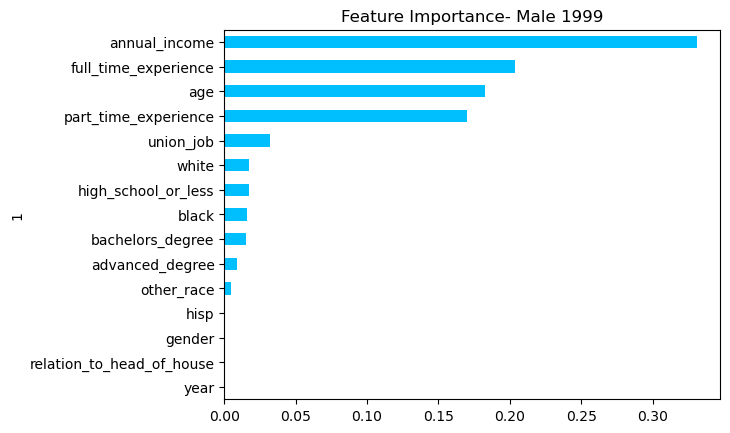

In [21]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 1999', legend=False)

In [ ]:
# Define features set **
X = male07_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male07_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


In [ ]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 2007', legend=False)

In [22]:
# Define features set **
X = male11_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = male11_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,6,34
Actual 1,6,616


Accuracy Score : 0.9395770392749244
Classification Report
              precision    recall  f1-score   support

           0       0.50      0.15      0.23        40
           1       0.95      0.99      0.97       622

    accuracy                           0.94       662
   macro avg       0.72      0.57      0.60       662
weighted avg       0.92      0.94      0.92       662



[(0.40114394625097316, 'annual_income'),
 (0.1946455925440314, 'full_time_experience'),
 (0.18224163555212913, 'age'),
 (0.12808889524902625, 'part_time_experience'),
 (0.020126039506505593, 'union_job'),
 (0.015323007827203718, 'black'),
 (0.014672588207191686, 'high_school_or_less'),
 (0.013271370430981538, 'bachelors_degree'),
 (0.012323013488718474, 'white'),
 (0.008414698147694376, 'advanced_degree'),
 (0.006161627173056844, 'hisp'),
 (0.0035875856224878567, 'other_race'),
 (0.0, 'year'),
 (0.0, 'relation_to_head_of_house'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Male 2011'}, ylabel='1'>

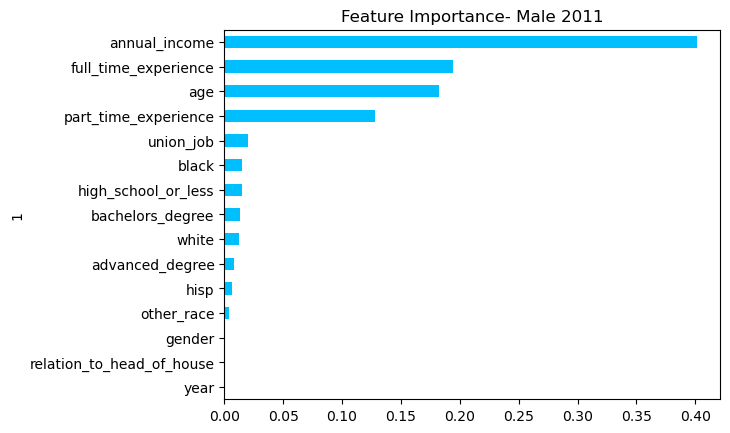

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deepskyblue', title= 'Feature Importance- Male 2011', legend=False)

In [24]:
# Define features set **
X = female81_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female81_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,60,69
Actual 1,30,359


Accuracy Score : 0.8088803088803089
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.47      0.55       129
           1       0.84      0.92      0.88       389

    accuracy                           0.81       518
   macro avg       0.75      0.69      0.71       518
weighted avg       0.80      0.81      0.80       518



[(0.3671641956339244, 'annual_income'),
 (0.18387688745353326, 'full_time_experience'),
 (0.18150616902885489, 'part_time_experience'),
 (0.1609006120561066, 'age'),
 (0.02546469135589398, 'relation_to_head_of_house'),
 (0.01999185907709892, 'union_job'),
 (0.01492407094603419, 'white'),
 (0.013944409412369367, 'black'),
 (0.01053943069828466, 'high_school_or_less'),
 (0.008837663461912663, 'bachelors_degree'),
 (0.007436394544922743, 'advanced_degree'),
 (0.004455997155514615, 'hisp'),
 (0.0009576191755497746, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Female 1981'}, ylabel='1'>

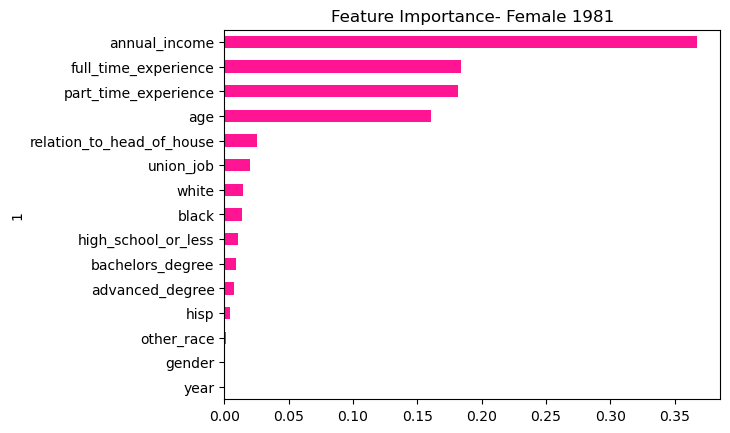

In [26]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Feature Importance- Female 1981', legend=False)

In [27]:
# Define features set **
X = female90_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female90_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,98,60
Actual 1,39,500


Accuracy Score : 0.8579626972740315
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.62      0.66       158
           1       0.89      0.93      0.91       539

    accuracy                           0.86       697
   macro avg       0.80      0.77      0.79       697
weighted avg       0.85      0.86      0.85       697



[(0.40347376849016575, 'annual_income'),
 (0.1703657007557248, 'full_time_experience'),
 (0.17005982973107714, 'part_time_experience'),
 (0.14169642502020474, 'age'),
 (0.029973587871307338, 'relation_to_head_of_house'),
 (0.01852114648412069, 'white'),
 (0.016583556311386187, 'union_job'),
 (0.015066789230489357, 'black'),
 (0.011841593828292201, 'high_school_or_less'),
 (0.009395953175190914, 'bachelors_degree'),
 (0.005688421501438751, 'advanced_degree'),
 (0.004348984712142614, 'hisp'),
 (0.002984242888459543, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Female 1990'}, ylabel='1'>

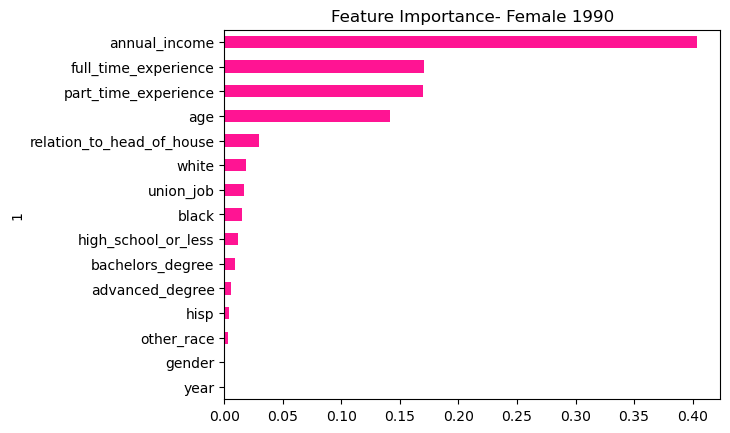

In [28]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Feature Importance- Female 1990', legend=False)

In [29]:
# Define features set **
X = female99_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female99_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,61,79
Actual 1,28,528


Accuracy Score : 0.8462643678160919
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.44      0.53       140
           1       0.87      0.95      0.91       556

    accuracy                           0.85       696
   macro avg       0.78      0.69      0.72       696
weighted avg       0.83      0.85      0.83       696



[(0.37765236665053553, 'annual_income'),
 (0.1720906339981295, 'part_time_experience'),
 (0.16874920285510012, 'age'),
 (0.16857410652804883, 'full_time_experience'),
 (0.032076677715375174, 'relation_to_head_of_house'),
 (0.019696191092900727, 'union_job'),
 (0.014448315350698179, 'white'),
 (0.012996961089125576, 'black'),
 (0.011823451308185953, 'high_school_or_less'),
 (0.008927621271596936, 'bachelors_degree'),
 (0.007645454759855431, 'advanced_degree'),
 (0.0028898146658774527, 'other_race'),
 (0.0024292027145705955, 'hisp'),
 (0.0, 'year'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Female 1999'}, ylabel='1'>

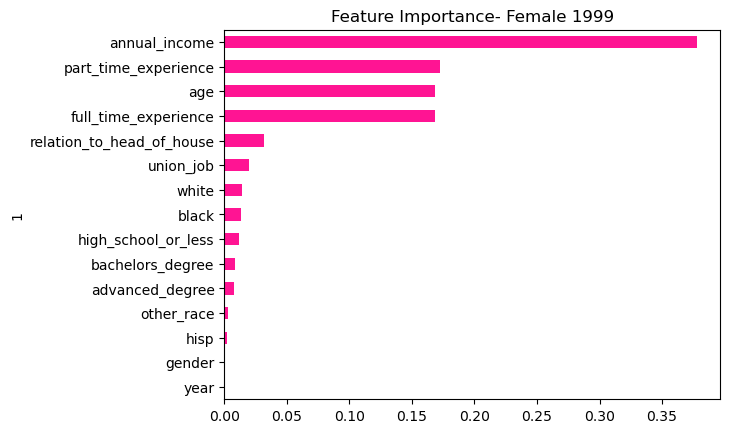

In [30]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Feature Importance- Female 1999', legend=False)

In [31]:
# Define features set **
X = female07_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female07_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,60,81
Actual 1,35,615


Accuracy Score : 0.8533501896333755
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.43      0.51       141
           1       0.88      0.95      0.91       650

    accuracy                           0.85       791
   macro avg       0.76      0.69      0.71       791
weighted avg       0.84      0.85      0.84       791



[(0.3782662042231257, 'annual_income'),
 (0.17723762966225087, 'full_time_experience'),
 (0.1638448830296079, 'part_time_experience'),
 (0.1595856382832884, 'age'),
 (0.03409936657555393, 'relation_to_head_of_house'),
 (0.018301029232949434, 'union_job'),
 (0.0149493256150848, 'black'),
 (0.014483371435251887, 'white'),
 (0.013959813889227093, 'high_school_or_less'),
 (0.010886653990093467, 'bachelors_degree'),
 (0.008540874064961946, 'advanced_degree'),
 (0.003919814279269397, 'hisp'),
 (0.001925395719335384, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Female 2007'}, ylabel='1'>

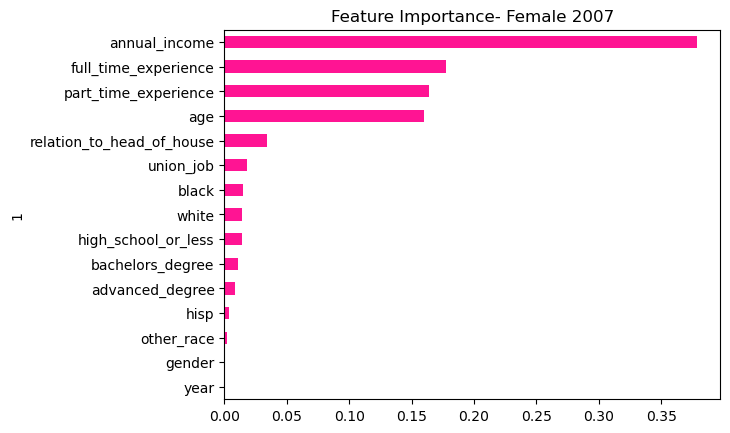

In [32]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Feature Importance- Female 2007', legend=False)

In [33]:
# Define features set **
X = female11_df.copy()
X.drop("full_time_job", axis=1, inplace=True)

# Define target vector **
y = female11_df["full_time_job"].ravel()
y[:5]

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,67,96
Actual 1,39,585


Accuracy Score : 0.8284625158831004
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.41      0.50       163
           1       0.86      0.94      0.90       624

    accuracy                           0.83       787
   macro avg       0.75      0.67      0.70       787
weighted avg       0.81      0.83      0.81       787



[(0.4103496364725991, 'annual_income'),
 (0.16410036887240834, 'full_time_experience'),
 (0.15439876044385092, 'age'),
 (0.15377486284639003, 'part_time_experience'),
 (0.03517837375418181, 'relation_to_head_of_house'),
 (0.01555251508171461, 'union_job'),
 (0.014513570702130083, 'white'),
 (0.013325235002256634, 'black'),
 (0.012488975174370927, 'high_school_or_less'),
 (0.010356833156795945, 'bachelors_degree'),
 (0.007004697702466972, 'advanced_degree'),
 (0.006332421516600843, 'hisp'),
 (0.0026237492742336027, 'other_race'),
 (0.0, 'year'),
 (0.0, 'gender')]

<AxesSubplot:title={'center':'Feature Importance- Female 2011'}, ylabel='1'>

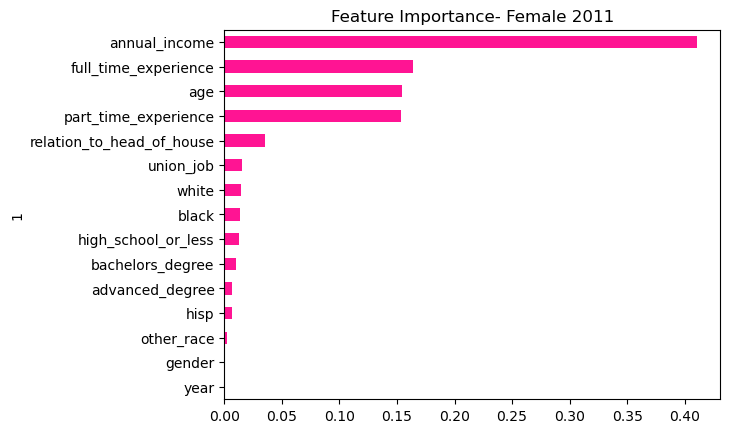

In [34]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='deeppink', title= 'Feature Importance- Female 2011', legend=False)